In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('laptop_data.csv')

In [5]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.shape

(1303, 12)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [30]:
df.drop(columns=['Touchscrees'],inplace=True)

In [10]:
df['Ram']=df['Ram'].str.replace('GB','')

In [11]:
df['Weight']=df['Weight'].str.replace('kg','')

In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [13]:
df['Weight']=df['Weight'].astype('float32')

In [14]:
df['Ram']=df['Ram'].astype('int32')

In [15]:
import seaborn as sns
sns.set_style("whitegrid")

c:\Users\sudee\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

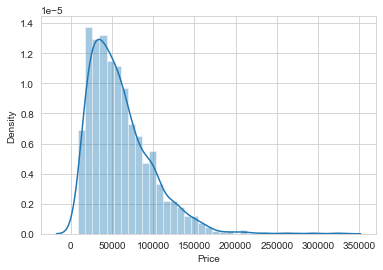

In [16]:
sns.distplot(df['Price'])

<AxesSubplot:>

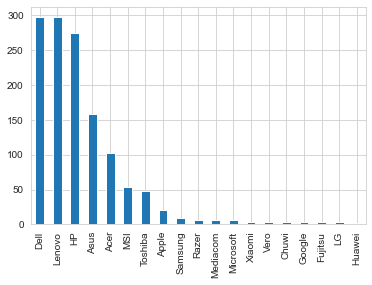

In [17]:
df['Company'].value_counts().plot(kind='bar')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

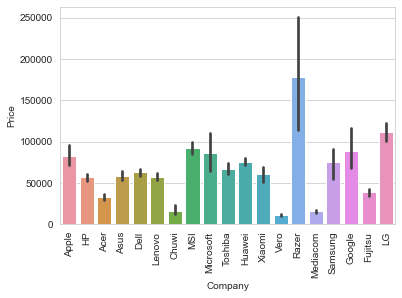

In [18]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

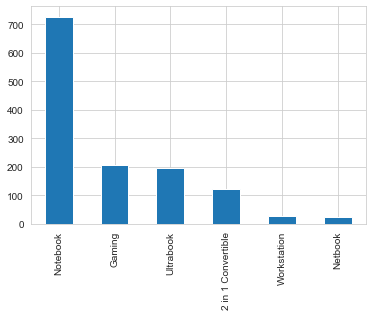

In [19]:
df['TypeName'].value_counts().plot(kind='bar')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

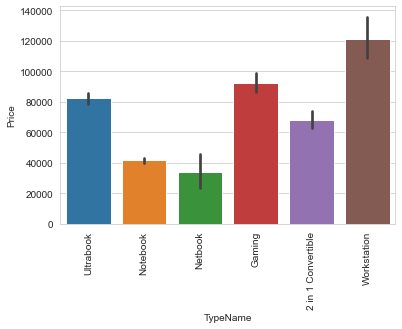

In [20]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

c:\Users\sudee\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

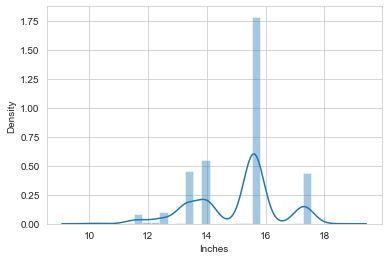

In [21]:
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

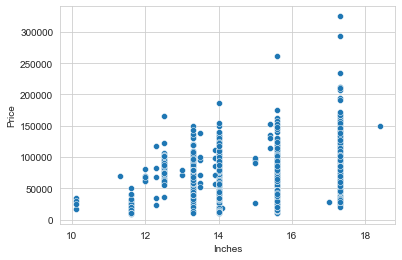

In [22]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [23]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [28]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [29]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscrees,Touchscreen
1090,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3700 1.6GHz,4,500GB HDD,Intel HD Graphics,Linux,2.20,20965.1472,0,0
452,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,2.31,81731.5200,0,0
621,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.65,78055.2000,0,0
364,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8,256GB SSD,Nvidia GeForce 920MX,No OS,2.20,26586.7200,0,0
690,Acer,Notebook,14.0,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45,19980.0000,0,0


<AxesSubplot:>

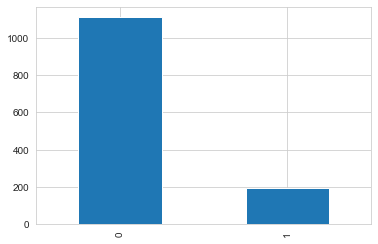

In [31]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

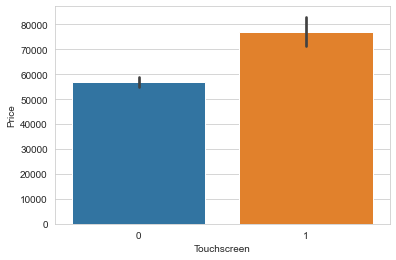

In [32]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [33]:
df['Ips']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

<AxesSubplot:>

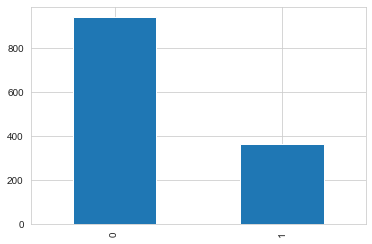

In [34]:
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

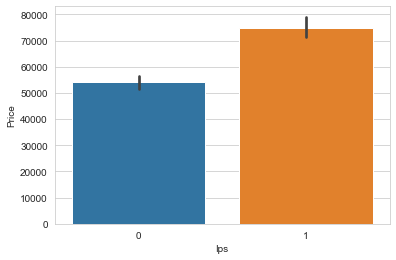

In [35]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [36]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [37]:
df['x_res']=new[0]
df['y_res']=new[1]

In [38]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res
1157,Lenovo,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12,512GB SSD,Intel HD Graphics 520,Windows 7,1.40,122490.720,0,0,Full HD 1920,1080
553,HP,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.65,28992.312,0,0,1600,900
312,MSI,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.80,111834.720,0,1,IPS Panel Full HD 1920,1080
103,HP,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,1.38,59620.320,0,1,IPS Panel Full HD 1920,1080
377,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.60GHz,4,500GB HDD,Intel HD Graphics 400,Windows 10,1.80,16463.520,0,0,1366,768
190,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16,1TB SSD,Intel HD Graphics 620,Windows 10,1.42,150462.720,1,0,Touchscreen 2560,1440
938,Dell,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,87325.920,0,0,Full HD 1920,1080
63,Asus,Notebook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.40,50136.480,0,0,Full HD 1920,1080
315,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.33,44968.320,0,0,Full HD 1920,1080
810,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,1TB HDD,AMD Radeon RX 580,Windows 10,3.74,93186.720,0,1,IPS Panel Full HD 1920,1080


In [40]:
df['x_res']=df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [41]:
df['x_res']=df['x_res'].astype('int32')

In [42]:
df['y_res']=df['y_res'].astype('int32')

In [43]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

In [44]:
df['ppi']=(((df['x_res']**2+df['y_res']**2)**0.5)/df['Inches']).astype('float')

In [45]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
x_res          0.556529
y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [46]:
df.drop(columns=['ScreenResolution','Inches','x_res','y_res'],inplace=True)

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005
